In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
sys.path.insert(0,'../../..')

In [2]:
import propopt 

import numpy as np 
from scipy import interpolate
import matplotlib.pyplot as plt 


In [3]:
import propopt
from propopt import propagate as prop
#import propopt.propagate as prop 

In [4]:
###import needed packages 
import cv2 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 

In [5]:
#import an image file

npix = 128 

inputimg = "nguyen_DOEpag49_"+str(npix)+"px_bw.png"

img_gray0 = cv2.imread(inputimg, cv2.IMREAD_UNCHANGED)

ret, bw_img = cv2.threshold(img_gray0,127,255,cv2.THRESH_BINARY)

img_gray0 = 1- bw_img[:,:,0]/255
img_gray0 = 1-img_gray0
img_gray2 = img_gray0.astype('bool')


<IPython.core.display.Javascript object>


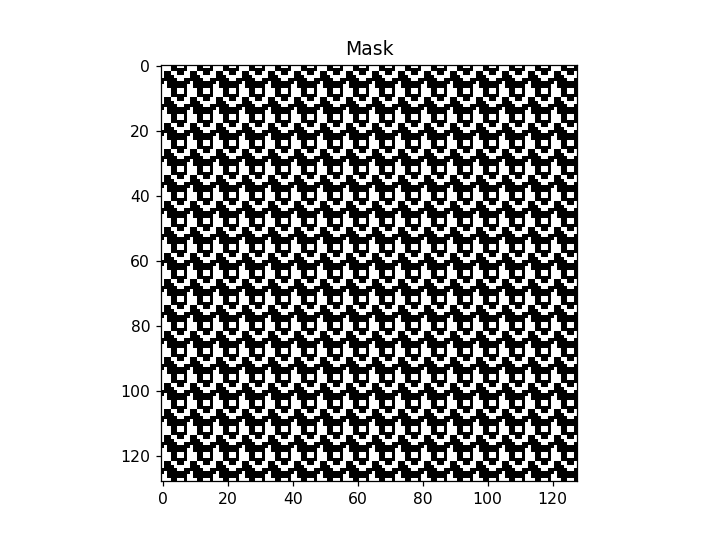

The number of screen is not large enough, I will resize them for you.
Rescaled the screen pixels to 512^2 . The computation will now proceed


<IPython.core.display.Javascript object>


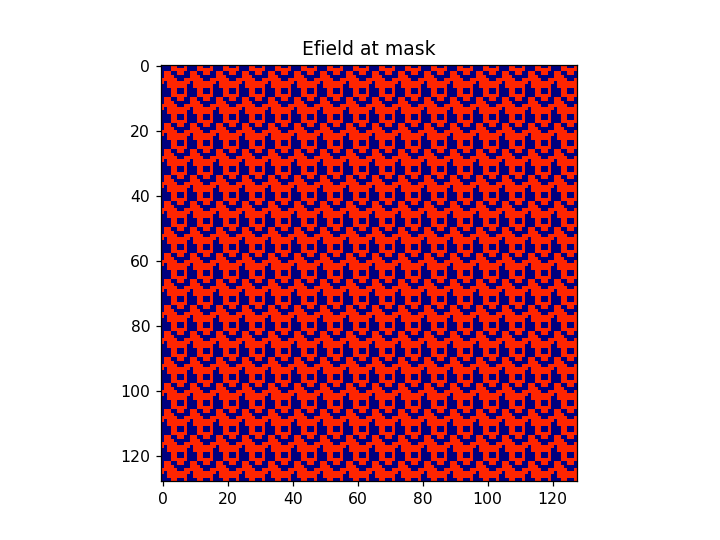

9.508489800979599e-12
5.1471854036415174e-11
0.0
0.001953125
0.00390625
0.005859375
0.0078125
0.009765625
0.01171875
0.013671875
0.015625
0.017578125
0.01953125
0.021484375
0.0234375
0.025390625
0.02734375
0.029296875
0.03125
0.033203125
0.03515625
0.037109375
0.0390625
0.041015625
0.04296875
0.044921875
0.046875
0.048828125
0.05078125
0.052734375
0.0546875
0.056640625
0.05859375
0.060546875
0.0625
0.064453125
0.06640625
0.068359375
0.0703125
0.072265625
0.07421875
0.076171875
0.078125
0.080078125
0.08203125
0.083984375
0.0859375
0.087890625
0.08984375
0.091796875
0.09375
0.095703125
0.09765625
0.099609375
0.1015625
0.103515625
0.10546875
0.107421875
0.109375
0.111328125
0.11328125
0.115234375
0.1171875
0.119140625
0.12109375
0.123046875
0.125
0.126953125
0.12890625
0.130859375
0.1328125
0.134765625
0.13671875
0.138671875
0.140625
0.142578125
0.14453125
0.146484375
0.1484375
0.150390625
0.15234375
0.154296875
0.15625
0.158203125
0.16015625
0.162109375
0.1640625
0.166015625
0.16796875
0

In [18]:
#Exemplify the application of the Rayleigh-Sommerfeld integral 

zs          = 180*1e-3  #distance to screen in meters 
mask        = img_gray0 #mask file normalized to [0,1]
npixmask    = npix      #number of pixels on lateral side of mask   -> needs to be checked with the mask 
pixsizemask = 1e-6      #size of pixel of the mask [m]
npixscreen  = npix      # number of pixels on lateral side of screen 
dxscreen    = 100e-3    #x side of the screen [m]
dyscreen    = 100e-3    #y side of the screen [m]
wavelength  = 1550e-9   #wavelength of the light [m]
I0          = 1e-3      #intensity of the light at the mask plane [W/m2]

fig=plt.figure()
plt.imshow(bw_img[:,:,0], vmin=0, vmax=255, cmap=plt.get_cmap("Greys"))
plt.title("Mask")

#call the RS integral of the first kind 
intensity = prop.RS_int(zs, mask, npixmask, pixsizemask, npixscreen, dxscreen, dyscreen, wavelength, I0, verbose = True)


<IPython.core.display.Javascript object>


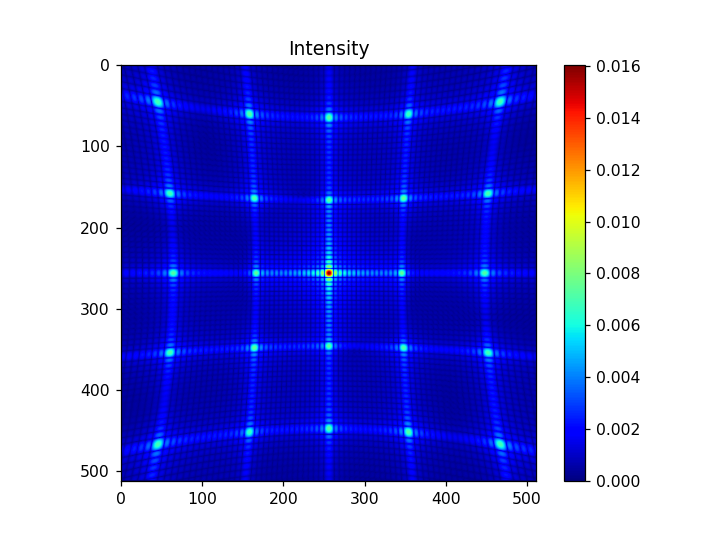

Text(0.5, 1.0, 'Intensity')

In [20]:
### Add benchmarks for the fresnel and fraunhofer parts 


fig=plt.figure()
plt.imshow(np.real(intensity[2]),cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Intensity")
#intensity[2]